# Project on Data Sciences and Machine Learning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
df = pd.read_csv('diabetic_data.csv')

# View first few rows
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df_id = pd.read_csv('IDs_mapping.csv')
df_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [6]:
df.shape

(101766, 50)

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [59]:
datatypes=df.dtypes
datatypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [10]:
df_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [12]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 757.6 kB/s eta 0:00:12
   -


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [45]:
# Check missing values
missing = df.isna().sum()
missing.sort_values(ascending=False)


max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [47]:
df['weight']

0         ?
1         ?
2         ?
3         ?
4         ?
         ..
101761    ?
101762    ?
101763    ?
101764    ?
101765    ?
Name: weight, Length: 101766, dtype: object

In [ ]:
#count the missing value with mark"?"

# Loop through columns
for col in df.columns:
    if df[col].dtype == 'object':
        count = 0
        for idx in df.index:
            if df.at[idx, col] in ['?']:
                count += 1
               
        if count > 0:
            print([col, count])


['race', 2273]
['weight', 98569]
['payer_code', 40256]
['medical_specialty', 49949]
['diag_1', 21]
['diag_2', 358]
['diag_3', 1423]


In [19]:
# Drop columns with too many missing values or not useful for prediction
#'encounter_id', 'patient_nbr'
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)


In [21]:
df.shape

(101766, 47)

In [ ]:
# dropping encounter_id and patient_nbr as these features are not having any impact on the data
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [23]:
df.shape

(101766, 45)

In [24]:
#count the missing value with mark"?"

# Loop through columns
for col in df.columns:
    if df[col].dtype == 'object':
        count = 0
        for idx in df.index:
            if df.at[idx, col] in ['?']:
                count += 1
               
        if count > 0:
            print([col, count])

['race', 2273]
['diag_1', 21]
['diag_2', 358]
['diag_3', 1423]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [29]:
df['race'].mode()

0    Caucasian
Name: race, dtype: object

In [32]:
#imputing missing values
df = df.replace('?', np.nan)
imputer = SimpleImputer(strategy='most_frequent')
df['race'] = imputer.fit_transform(df[['race']]).ravel()


In [33]:
#count the missing value with mark"?"

# Loop through columns
for col in df.columns:
    if df[col].dtype == 'object':
        count = 0
        for idx in df.index:
            if df.at[idx, col] in ['?']:
                count += 1
               
        if count > 0:
            print([col, count])

Index(['[70-80)', '[60-70)', '[50-60)', '[80-90)', '[40-50)', '[30-40)',
       '[90-100)', '[20-30)', '[10-20)', '[0-10)'],
      dtype='object', name='age')


Text(0.5, 0, 'Age')

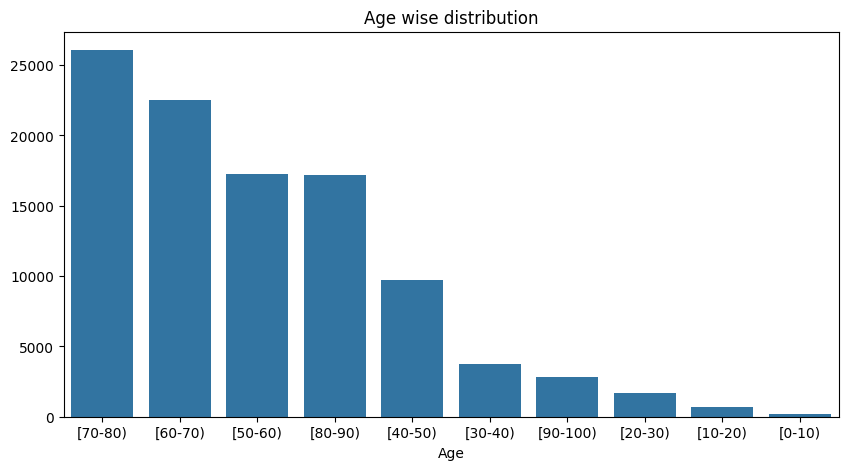

In [10]:
vc = df['age'].value_counts()
print(vc.index)
plt.figure(figsize=(10, 5))
sns.barplot(x=vc.index, y=vc.values)
plt.title('Age wise distribution')
plt.xlabel('Age')

<Axes: xlabel='age'>

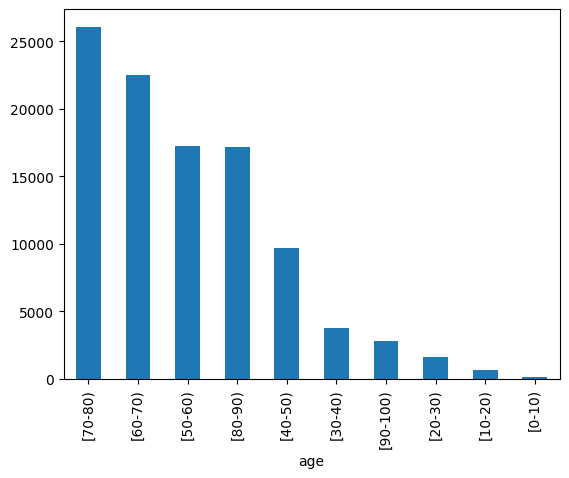

In [11]:
df['age'].value_counts().plot(kind='bar')

Text(0.5, 0, 'ICD-9 Diagnosis Code')

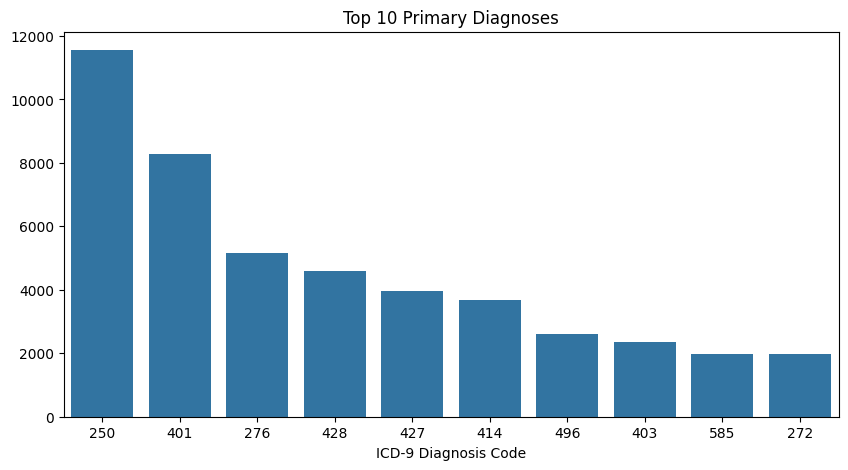

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

top_diag1 = df['diag_3'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_diag1.index.astype(str), y=top_diag1.values)
plt.title('Top 10 Primary Diagnoses')
plt.xlabel('ICD-9 Diagnosis Code')


In [30]:
print(df.loc[:, ['diag_1', 'diag_2', 'diag_3']])

        diag_1  diag_2 diag_3
0       250.83       ?      ?
1          276  250.01    255
2          648     250    V27
3            8  250.43    403
4          197     157    250
...        ...     ...    ...
101761  250.13     291    458
101762     560     276    787
101763      38     590    296
101764     996     285    998
101765     530     530    787

[101766 rows x 3 columns]


In [44]:
df['diag_1'].unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

In [ ]:
df['diag_1'].nunique() #Count the number of unique values

717

In [39]:
df_icd = pd.read_csv('ICD9 Classification.csv')
df_icd

,CodeF,CodeL,Code,Description,Range
0,1,139,1,INFECTIOUS AND PARASITIC DISEASES,001-139
1,140,239,2,NEOPLASMS,140-239
2,240,279,3,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES...",240-279
3,280,289,4,DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,280-289
4,290,319,5,"MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DIS...",290-319
5,320,389,6,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,320-389
6,390,459,7,DISEASES OF THE CIRCULATORY SYSTEM,390-459
7,460,519,8,DISEASES OF THE RESPIRATORY SYSTEM,460-519
8,520,579,9,DISEASES OF THE DIGESTIVE SYSTEM,520-579
9,580,629,10,DISEASES OF THE GENITOURINARY SYSTEM,580-629
